<div style="background-color: #c1f2a5">


# PS7

**BECAUSE THIS IS THE FINAL PROBLEM SET, MOST QUESTIONS ARE [SOLO] QUESTIONS.**

You are NOT allowed to ask your peers or any of the GSIs for help on [SOLO] questions. However, you can post _clarification_ questions on Ed if anything about the instructions or content of the problem set is unclear. Any questions asking for hints or debugging help will be disregarded. 
    

**Note: unlike previous problem sets which had 2 parts, PS7 has 3 parts. Each part can be done independently. Parts 2 and 3 are much shorter than part 1.**  
    
</div> 

----

<div style="background-color: #c1f2a5">
    
# Part 1

In Part 1 of this problem set, you are going to implement an exemplar model and a prototype model, and evaluate their predictions.
    
## Instructions

Remember to do your problem set in Python 3. Make sure you fill in any place that says `#YOUR CODE HERE` or "YOUR ANSWER HERE".

Unless we specify otherwise, make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
**Test cases are here to help you debug your code but passing them is not a guarantee that your code is correct.**
    
</div>

In [1]:
import numpy as np
from nose.tools import assert_equal
from numpy.testing import assert_array_equal, assert_almost_equal
from itertools import product
import matplotlib.pyplot as plt

----

## Q1 Coding Tversky's Contrast Model
This part of the problem set explores exemplar and prototype models. 

Let's start with an examplar model we saw in class: Tversky's constrast model.

Recall from lecture and readings that Tversky defined the similarity between objects $a$ and $b$ as:

$$
S(a,b) = \theta\cdot f(A \cap B) - \alpha\cdot f(A - B) - \beta\cdot f(B-A)
$$

Here, $a$ and $b$ are the two objects being compared, $A$ is the set of features of $a$, $B$ is the set of features of $b$, $f$ is an additive function that maps sets to numbers, and $\theta, \alpha, \beta$ are free parameters all $\ge 0$.

In this set of questions, you will write code to implement Tversky's contrast model. 

We will compute each part of the similarity function in turn. First, we need to compute $f(A\cap B)$, which is essentially the *number of features that $A$ and $B$ have in common*. As an example, consider the following fruits:

|            | Sweet | Sour  | Bitter | Salty | Seeds |
|:-----------|:-----:|:-----:|:------:|:-----:|:-----:|
| Orange     | 1     | 1     | 0      | 0     | 1     |
| Lemon      | 0     | 1     | 1      | 0     | 1     |

The information in the table above could also be stored in a NumPy array, where `True` means the fruit has a feature and `False` means it does not. So, the features of "orange" and "lemon" could be represented as:

In [2]:
orange_features = np.array([True,  True,  False, False, True ])
lemon_features  = np.array([False, True,  True,  False, True ])

What is the number of features that orange and lemon have in common? A feature only counts as being "in common" if *both* feature vectors have it, so in this case, the only common features between orange and lemon are "sour" and "seeds" (not "salty", because neither of them have this feature). Thus, orange and lemon have two features in common.


### Q1.1 Common features [2pts, HELP]

Complete the function <code>common_features</code> below so that it takes two binary feature vectors of length $n$ (<code>a</code> and <code>b</code>) as arguments and returns the total number of features in common between <code>a</code> and <code>b</code>. Here, we define the "number of common features" as the number of cells that are <code>True</code> in both <code>a</code> and <code>b</code> arrays.

In [3]:
def common_features(a, b):
    """
    Compute the number of common features between a and b. Features 
    count as being shared between the vectors if they are present in
    both vectors (i.e., they are a 1 in both). In other words, you should
    compute the intersection of features between a and b.
    
    Hint: your solution can be done in a single line of code, including
    the return statement.
    
    Parameters
    ----------
    a, b : boolean numpy array with shape (n,)
    
    Returns
    -------
    number of common features between a and b
    
    """
    #YOUR CODE HERE
    return np.count_nonzero(a&b)

Test your `common_features` function on the orange and lemon features, to see if it does in fact return 2:

In [4]:
print(r"f(orange ∩ lemon) = " + str(common_features(orange_features, lemon_features)))

f(orange ∩ lemon) = 2


In [5]:
# optional: add your own test cases here!


Test the `common_features` function:

In [6]:
assert_equal(common_features(np.array([True, True, False, False]), np.array([True, True, False, False])), 2)
assert_equal(common_features(np.array([True, False, False, False]), np.array([True, True, False, False])), 1)
assert_equal(common_features(np.array([True, False, True, False]), np.array([True, True, False, False])), 1)
assert_equal(common_features(np.array([False, False, False, False]), np.array([False, False, False, False])), 0)
assert_equal(common_features(np.array([True, True, True, True]), np.array([True, True, True, True])), 4)
print("Success!")


Success!


Below, we define some test features to try. The following cell uses your function `common_features` to plot the shared features between multiple arrays. 

It's missing some things to make it a good figure: add axes labels, axes ticks, and a title to make it clear what the image is showing. 

Once you have made the necessary changes to the plot (NOT the data!), save your figure as `PS7_Q1_1.png` and upload it to Gradescope. 

In [7]:
# DO NOT MODIFY THIS CELL!

# Generate all possible combinations of True and False for size 3
all_combinations = list(product([True, False], repeat=3))
# Convert the combinations to NumPy arrays
all_arrays = [np.array(combination) for combination in all_combinations]

shared_features = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        shared_features[i,j] = int(common_features(all_arrays[i],all_arrays[j]))

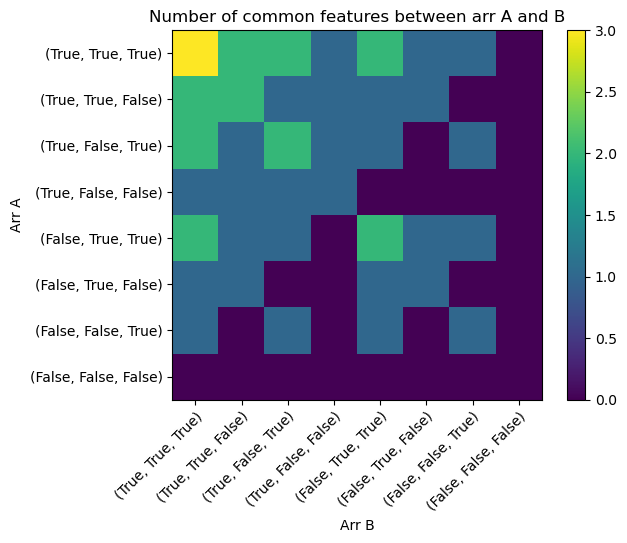

In [8]:
# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE

figure, axis = plt.subplots()

# Plot the array as a colormap
plt.imshow(shared_features, cmap='viridis')  # 'viridis' is just an example colormap; you can choose any other colormap

# Add a colorbar for reference
plt.colorbar()

axis.set_ylabel('Arr A')
axis.set_xlabel('Arr B')
axis.set_xticks(np.arange(len(all_arrays)), labels=all_combinations)
axis.set_yticks(np.arange(len(all_arrays)), labels=all_combinations)
plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
axis.set_title("Number of common features between arr A and B")

plt.savefig('PS7_Q1_1.png') # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
plt.show()

----

### Q1.2 Differences in features [2pts, SOLO]
To complete Tversky's equation, we also need to compute $f(A-B)$ and $f(B-A)$. This can be done using the same operation: counting the number of features that are in one vector, but not the other. As an example, let's take a look at some more fruits:

|            | Sweet | Sour  | Bitter | Salty | Seeds |
|:-----------|:-----:|:-----:|:------:|:-----:|:-----:|
| Grapefruit | 1     | 1     | 1      | 0     | 1     |
| Banana     | 1     | 0     | 0      | 0     | 0     |

If we wanted to compute $f(\text{grapefruit}-\text{banana})$, we want to count the number of features grapefruit has that banana does not. 

In this case, there are three features matching this description: "sour", "bitter", and "seeds", so $f(A-B)$ should return $3$. Similarly, to compute $f(\text{banana}-\text{grapefruit})$, we want to count features that are in banana but not in grapefruit. In these example, there are actually *no* features that the banana has that the grapefruit does not, so $f(B-A)$ should return $0$.

Complete the function `differences` so that it takes two binary feature vectors of length $n$ (`a` and `b`, just like before) as arguments and returns the total number of features in `a` that are not contained in `b`. This is defined as the number of cells that are `True` in `a` and `False` in `b`.

In [9]:
def differences(a, b):
    """
    Compute the number of features that belong to a, but not b. Features 
    count as being in a but not b if the feature is 1 in a, and 0 in b.
    
    Hint: your solution can be done in a single line of code, including
    the return statement.
    
    Parameters
    ----------
    a, b : boolean numpy array with shape (n,)
    
    Returns
    -------
    number of differences between a and b
    
    """
    #YOUR CODE HERE
    return np.count_nonzero([c == (True, False) for c in list(zip(a,b))])

Test your `differences` function on the orange and lemon feature vectors to see if it works!

In [10]:
# define the feature vectors
grapefruit_features = np.array([True,  True,  True,  False, True ])
banana_features     = np.array([True,  False, False, False, False])

print("f(grapefruit - banana) = " + str(differences(grapefruit_features, banana_features)))
print("f(banana - grapefruit) = " + str(differences(banana_features, grapefruit_features)))

f(grapefruit - banana) = 3
f(banana - grapefruit) = 0


In [11]:
# optional: add your own test cases here!


In [12]:
"""Test your differences function."""
assert_equal(differences(np.array([True, True, False, False]), np.array([True, True, False, False])), 0)
assert_equal(differences(np.array([True, False, False, False]), np.array([True, True, False, False])), 0)
assert_equal(differences(np.array([True, False, True, False]), np.array([True, True, False, False])), 1)
assert_equal(differences(np.array([True, True, True, True]), np.array([False, False, False, False])), 4)
assert_equal(differences(np.array([True, True, True, True]), np.array([False, False, False, True])), 3)
assert_equal(differences(np.array([False, False, False, False]), np.array([False, False, False, False])), 0)
assert_equal(differences(np.array([True, True, True, True]), np.array([True, True, True, True])), 0)

print("Success!")

Success!


Below, we define some test features to try. The following cell uses your function `differences` to plot the shared features between multiple arrays. 

It's missing some things to make it a good figure: add axes labels, axes ticks, and a title to make it clear what the image is showing. 

Once you have made the necessary changes to the plot (NOT the data!), save your figure as `PS7_Q1_2.png` and upload it to Gradescope. 

In [13]:
# DO NOT MODIFY THIS CELL!

# Generate all possible combinations of True and False for size 3
all_combinations = list(product([True, False], repeat=3))
# Convert the combinations to NumPy arrays
all_arrays = [np.array(combination) for combination in all_combinations]

shared_features = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        shared_features[i,j] = int(differences(all_arrays[i],all_arrays[j]))

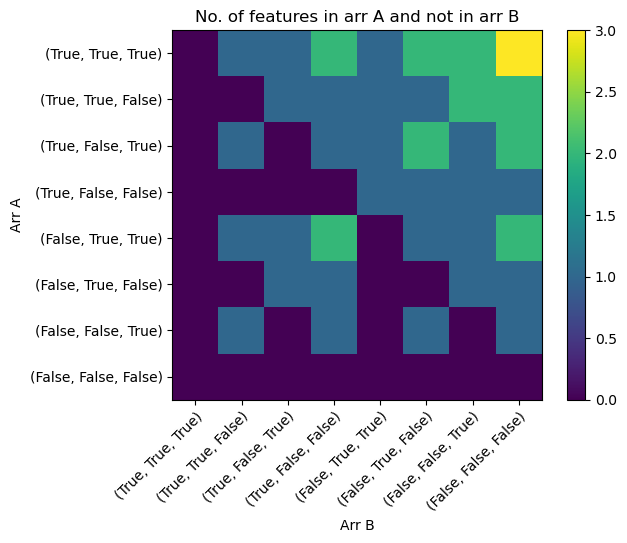

In [14]:
# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE

figure, axis = plt.subplots()

# Plot the array as a colormap
plt.imshow(shared_features, cmap='viridis')  # 'viridis' is just an example colormap; you can choose any other colormap

# Add a colorbar for reference
plt.colorbar()

axis.set_ylabel('Arr A')
axis.set_xlabel('Arr B')
axis.set_xticks(np.arange(len(all_arrays)), labels=all_combinations)
axis.set_yticks(np.arange(len(all_arrays)), labels=all_combinations)
plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
axis.set_title("No. of features in arr A and not in arr B")

plt.savefig('PS7_Q1_2.png')  # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
plt.show()

----

### Q1.3 Tversky's similarity [4pts, SOLO]

You now have all the elements you need to implement the equation for Tverky's similarity. 
Using your completed functions `common_features` and `differences`, complete Tversky's similarity function in `tversky_sim` below according to the quation provided.

In [15]:
def tversky_sim(a, b, theta=1.0, alpha=0.5, beta=0.5):
    """
    Compute Tversky's similarity function for two vectors a and b:
    
    S(a, b) = theta*f(a ∩ b) - alpha*f(a - b) - beta*f(b - a)
    
    Parameters
    ----------
    a, b : boolean numpy array with shape (n,)
    theta, alpha, beta : parameters of the similarity function
    
    Returns
    -------
    the similarity between a and b : float
    
    """
    #YOUR CODE HERE
    return theta * common_features(a,b) - alpha * differences(a,b) - beta * differences(b,a)

In [16]:
# optional: add your own test cases here!


Run the cell below to test your `tversky_sim` function:

In [17]:
x = np.array([True, True, True, False, False, False])
y = np.array([False, True, True, True, False, True])

# check some explicit values
assert_equal(tversky_sim(x, y), 0.5)
assert_equal(tversky_sim(y, x), 0.5)
assert_equal(tversky_sim(x, y, theta=2.0), 2.5)
assert_equal(tversky_sim(y, x, theta=2.0), 2.5)
assert_equal(tversky_sim(x, y, alpha=1.0), 0.0)
assert_equal(tversky_sim(y, x, alpha=1.0), -0.5)
assert_equal(tversky_sim(x, y, beta=1.5), -1.5)
assert_equal(tversky_sim(y, x, beta=1.5), -0.5)

# check that it uses common_featues
old_common_features = common_features
del common_features
try:
    tversky_sim(x, y)
except NameError:
    pass
else:
    raise AssertionError("tversky_sim does not use common_features")
finally:
    common_features = old_common_features
    del old_common_features

# check that it uses differences
old_differences = differences
del differences
try:
    tversky_sim(x, y)
except NameError:
    pass
else:
    raise AssertionError("tversky_sim does not use differences")
finally:
    differences = old_differences
    del old_differences

print("Success!")

Success!


Below, we define some test features to try. The following cell calls your function `tversky_sim` to plot the shared features between multiple arrays. 

It's missing some things to make it a good figure: add axes labels, axes ticks, titles, and a global title for the parent figure to make it clear what the image is showing. 

Once you have made the necessary changes to the plot (NOT the data!), save your figure as `PS7_Q1_3.png` and upload it to Gradescope. 

In [18]:
# DO NOT MODIFY THIS CELL!

# Generate all possible combinations of True and False for size 3
all_combinations = list(product([True, False], repeat=3))
# Convert the combinations to NumPy arrays
all_arrays = [np.array(combination) for combination in all_combinations]

shared_features1 = np.zeros([8,8])
shared_features2 = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        shared_features1[i,j] = int(tversky_sim(all_arrays[i],all_arrays[j],theta=2))
        shared_features2[i,j] = int(tversky_sim(all_arrays[i],all_arrays[j],theta=2,alpha=-1))

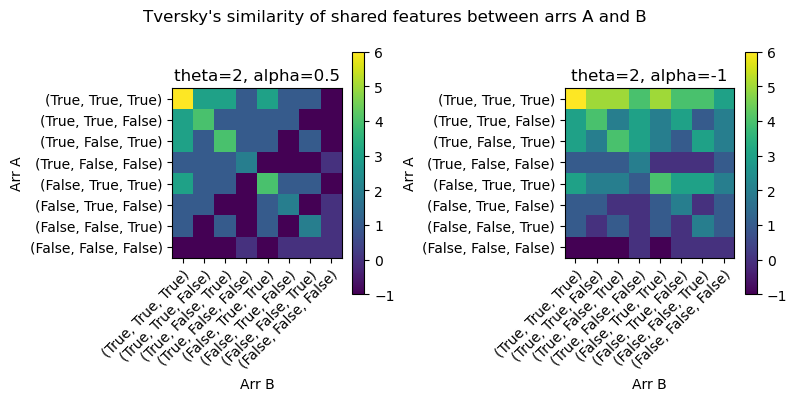

In [19]:
# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE

# Create subplots with a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    
im1 = axs[0].imshow(shared_features1, cmap='viridis')
fig.colorbar(im1, ax=axs[0])
im2 = axs[1].imshow(shared_features2, cmap='viridis')
fig.colorbar(im2, ax=axs[1])

for i in np.arange(2):
    axs[i].set_ylabel('Arr A')
    axs[i].set_xlabel('Arr B')
    axs[i].set_xticks(np.arange(len(all_arrays)), labels=all_combinations)
    axs[i].set_yticks(np.arange(len(all_arrays)), labels=all_combinations)
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
    
axs[0].set_title('theta=2, alpha=0.5')
axs[1].set_title('theta=2, alpha=-1')

plt.suptitle("Tversky's similarity of shared features between arrs A and B")

# Adjust layout to prevent clipping of titles
plt.tight_layout()

fig.savefig("PS7_Q1_3.png") # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
plt.show()

---
## Q2 Applying Tversky's Contrast Model

### Q2.1 Find similar animals [4pts, SOLO]
Now that we have a way of quantifying similarity, let's apply it to some real data. Here we have provided you with a dataset that includes 50 animals and 80 features, and specifies which animals have which features.

First, let's load our data in. There are three arrays in the data: `feature_names`, `animal_names`, and `animal_features`:

In [20]:
data = np.load("data/50animals.npz")
[k for k in data.keys()]

['animal_features', 'animal_names', 'feature_names']

The `animal_features` array is a $50\times 80$ boolean array of features, where each row corresponds to a different animal, and each column corresponds to a different feature:

In [21]:
animal_features = data['animal_features']
animal_features

array([[ True,  True, False, ..., False,  True, False],
       [ True,  True, False, ..., False,  True,  True],
       [ True, False,  True, ..., False,  True, False],
       ...,
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True, False, ...,  True,  True, False]])

And `animal_names` is a vector of length $50$ containing the animal names.

In [22]:
animal_names = data['animal_names']
animal_names

array(['antelope', 'bat', 'beaver', 'blue whale', 'bobcat', 'buffalo',
       'chihuahua', 'chimpanzee', 'collie', 'cow', 'dalmatian', 'deer',
       'dolphin', 'elephant', 'fox', 'german shepherd', 'giant panda',
       'giraffe', 'gorilla', 'grizzly bear', 'hamster', 'hippopotamus',
       'horse', 'humpback whale', 'killer whale', 'leopard', 'lion',
       'mole', 'moose', 'mouse', 'otter', 'ox', 'persian cat', 'pig',
       'polar bear', 'rabbit', 'raccoon', 'rat', 'rhinoceros', 'seal',
       'sheep', 'siamese cat', 'skunk', 'spider monkey', 'squirrel',
       'tiger', 'walrus', 'weasel', 'wolf', 'zebra'], dtype='<U15')

Similarly, the `feature_names` array is a vector of length 85 of the feature names. We actually won't need it for this problem, though, so we won't create a new variable for it.

Complete the function `find_similar_animals_tversky` to take the name of an animal and find the **5 most similar animals** to that animal, using your function `tversky_sim`. You should return the animals in order of most similar to least similar **excluding** the test animal itself.

Note: the `np.argsort()` function will come in handy here (take a look at Problem Set 0 if you forgot how it's used). To keep ties in the original order, make sure to use `mergesort` argument (which is [stable](http://programmers.stackexchange.com/a/247441)) like so:

```
indices = np.argsort(array, kind='mergesort')
```

In [23]:
def find_similar_animals_tversky(name, features, animal_names):
    """
    Finds the five most similar animals to the given animal. You should return the
    animals in order from most similar to least similar to the given animal. In
    addition, you should NOT include the given animal in the list of animals you
    return. 
    
    If two animals have the same similarity score, find_similar_animals 
    should break ties in the REVERSE of the order they appear in animal_names 
    (e.g., if the first two entries in animal_names are A and B, and both animals 
    A and B have the same similarity to target animal C, find_similar_animals should 
    place B BEFORE A when ranking them in terms of their similarity to C.)
    
    Hint: your solution can be done in 4 lines of code, including the return
    statement.
    
    Parameters
    ----------
    name : string
        the name of an animal
    features : boolean numpy array
        animals by features, with shape (n, m)
    animal_names : list of strings
        list of animal names with length n
    
    Returns
    -------
    a list of five animal names, ordered by most to least similar with ties in the original order
    
    """
    #YOUR CODE HERE
    index = np.where(animal_names == name)[0][0]
    indices = np.argsort([tversky_sim(features[index], f) for f in features], kind='mergesort')
    return [animal_names[i] for i in np.flip(indices)[1:6]]

Test the `find_similar_animals` function:

In [24]:
def assert_one_equal(arr, *others):
    for other in others:
        if arr == other:
            return
    assert_equal(arr, others[0])

# load the animal data
data = np.load("data/50animals.npz")
af = data['animal_features']
an = data['animal_names']
data.close()

# try finding animals similar to mouse
assert_array_equal(
    find_similar_animals_tversky('mouse', af, an),
    ['rat', 'rabbit', 'weasel', 'hamster', 'squirrel'])

# try finding animals similar to grizzly bear
assert_array_equal(
    find_similar_animals_tversky('grizzly bear', af, an),
    ['bobcat', 'polar bear', 'raccoon', 'lion', 'gorilla'])

# try finding animals similar to grizzly bear with different features
assert_array_equal(
    find_similar_animals_tversky('grizzly bear', ~af, an),
    ['polar bear', 'gorilla', 'german shepherd', 'bobcat', 'raccoon'])

# try finding animals similar to grizzly bear with different names
assert_array_equal(
    find_similar_animals_tversky('grizzly bear', af, an[::-1]),
    ['weasel', 'beaver', 'buffalo', 'tiger', 'collie'])

# try finding animals similar to grizzly bear with both different names and features
assert_array_equal(
    find_similar_animals_tversky('grizzly bear', ~af, an[::-1]),
    ['spider monkey', 'seal', 'weasel', 'dalmatian', 'giraffe'])

# check that it uses tversky_sim
old_tversky_sim = tversky_sim
del tversky_sim
try:
    find_similar_animals_tversky('mouse', af, an)
except NameError:
    pass
else:
    raise AssertionError("find_similar_animals does not use tversky_sim")
finally:
    tversky_sim = old_tversky_sim
    del old_tversky_sim

print("Success!")

Success!


In [25]:
# optional: add your own test cases here!

Now, you can use your function to find out which animals are most similar to a mouse:

In [26]:
# should print ['rat', 'rabbit', 'weasel', 'hamster', 'squirrel']
# make sure you have excluded 'mouse' itself from the top 5 most similar animals!
print(f"The 5 animals that are most similar to 'mouse' are: {find_similar_animals_tversky('mouse', animal_features, animal_names)}")

The 5 animals that are most similar to 'mouse' are: ['rat', 'rabbit', 'weasel', 'hamster', 'squirrel']


Copy-paste the output of the two cells below in Gradescope:

In [27]:
# Q2.1 (A)
# PASTE THE OUTPUT OF THIS CELL INTO GRADESCOPE 
print(find_similar_animals_tversky('giraffe', animal_features, animal_names))

['horse', 'deer', 'zebra', 'antelope', 'moose']


In [28]:
# Q2.1 (B)
# PASTE THE OUTPUT OF THIS CELL INTO GRADESCOPE 
print(find_similar_animals_tversky('grizzly bear', ~af, an[::-1]))

['spider monkey', 'seal', 'weasel', 'dalmatian', 'giraffe']


---

### Q2.2 Find similar animals to the giant panda [4pts, SOLO]

Run your function `find_similar_animals_tversky` for the input 'giant panda':

In [29]:
print(find_similar_animals_tversky('giant panda', animal_features, animal_names))

['moose', 'sheep', 'raccoon', 'mole', 'grizzly bear']


Answer the following questions in Gradescope:

A) What are the five most similar animals to `giant panda` that your function returned? Do they match your intuition (that is, if you were to intuitively pick out the five most similar animals to a giant panda (from the `animal_names` list), would you pick those five in that order)? (**2 points**)

The five most similar animals to giant panda that the function returned is moose, sheep, raccoon, mole, and grizzly bear.

This result does not match my intuition. Of the animals listed in animal_names, I would pick polar bear and grizzly bear as the first two most similar animals.

B) If yes, why do you think Tversky's contrast model did a good job at capturing your intuition? If no, what aspect(s) of Tversky's contrast model led the results to misalign with your intuition? (**2 points**)

The aspects of Tversky's contrast model that could've potentially led to the the results misaligning with my intuition is the sheer number of features (85) and the equal weighing (or lack of weights) between features. Without weights tied to the features, the model will skew towards results that match the most amount of features.

---

### Q2.3 Variant vs. prototype [4pts, SOLO]

Tversky's contrast model takes optional parameters, $\theta$, $\alpha$, and $\beta$, which bias the similarity more or less towards shared features versus feature differences. Recall from lecture that Tversky's notion of similarity says that the similarity of the *variant* to the *prototype* should be greater than the similarity of the *prototype* to the *variant*. More formally, if $a$ is the prototype and $b$ is the variant, then:

$$
S(b,a) − S(a,b) = (\alpha −\beta)[ f (A − B) − f (B − A)]
$$

Given this equation, $S(b,a)>S(a,b)$ when $\alpha>\beta$ *and* $f(A-B)>f(B-A)$. That is, when the prototype has more distinctive or heavily weighted features than the variant. Previously, we used the same value for both $\alpha$ and $\beta$, meaning that $S(b,a)=S(a,b)$. However, if we change these parameters, we can get asymmetric similarities.

Let's explore this idea a little further using the leopard and the tiger. 

Answer the following three questions in Gradescope:

A) First, which animal you would intuitively say is more prototypical: the leopard or the tiger? Why? Answer in **at most 2 sentences**. (**0.5 points**)

Of the two animals, I would say that the tiger is more prototypical. This is because the tiger is more prominently known and compared to as a big cat in comparison to the leopard.

Now, run the cell below to find out what Tversky's similarity metric says about the similarity:

In [30]:
leopard = animal_features[animal_names=='leopard'][0]
tiger = animal_features[animal_names=='tiger'][0]
print("S(leopard, tiger) = {}".format(tversky_sim(leopard, tiger, theta=1.0, alpha=2.5, beta=0.5)))
print("S(tiger, leopard) = {}".format(tversky_sim(tiger, leopard, theta=1.0, alpha=2.5, beta=0.5)))

S(leopard, tiger) = -4.0
S(tiger, leopard) = 8.0


B) What numbers did you get? Does Tversky's similarity metric say that a leopard is more similar to a tiger, or vice versa? Does this mean that Tversky's similarity metric says (in this case) that the prototype is more similar to the variant, or that the variant is more similar to the prototype? (**1.5 points**)

(Hint: What animal category are leopards and tigers members of? Which do you think is a more "prototypical" example of this category?) 

The numbers that were returned were -4 and 8. Thus, Tversky's similarity metric says between the two options, that a tiger is more similar to a leopard. This means that, in this case, Tversky's similarity metric says that the variant is more similar to the prototype.

C) Can Tversky's leopard vs. tiger similarity results be interpreted as counter-evidence for his notion that $S$(variant, prototype) $>$ $S$(prototype, variant), where $S$ is the similarity function? (**2 points**)

In terms of the effectiveness of Tversky's contrast model and its adherence to S(variant, prototype) > S(prototype, variant), yes this result can be interpreted as counter-evidence.

----

## Q3 Coding a Prototype Model
Let's now switch gears and move to a prototype model. We will first code it and then apply it to the same dataset as before. 

In this set of questions, you will write code to implement the prototype theory of categorization based on Shepard's universal law for calculating the similarity between pairs of stimuli. 

Recall that the features of the prototype should be determined by a "majority rule" vote between the members of the category: if **half or more** of the members in a category have a particular feature, the category prototype should have that feature; otherwise, it should not. For example, let's again say we have features for some fruits:

|            | Sweet | Sour  | Bitter | Salty | Seeds |
|:-----------|:-----:|:-----:|:------:|:-----:|:-----:|
| Apple      | 1     | 0     | 0      | 0     | 1     |
| Orange     | 1     | 1     | 0      | 0     | 1     |
| Lemon      | 0     | 1     | 1      | 0     | 1     |
| Grapefruit | 1     | 1     | 1      | 0     | 1     |
| Banana     | 1     | 0     | 0      | 0     | 0     |
| Tomato     | 1     | 0     | 0      | 0     | 1     |

As a NumPy array, the features of all fruits would look like this:

In [31]:
fruit_features = np.array([
    [True,  False, False, False, True ],
    [True,  True,  False, False, True ],
    [False, True,  True,  False, True ],
    [True,  True,  True,  False, True ],
    [True,  False, False, False, False],
    [True,  False, False, False, True ]])

The prototype for these features would then be:

| Sweet | Sour | Bitter | Salty | Seeds | 
|:-----:|:----:|:------:|:-----:|:-----:|
| 1     | 1    | 0      | 0     | 1     |

because 5 of 6 fruits have the "sweet" feature, 3 of 6 fruits have the "sour" feature, 2 of 6 fruits have the "bitter" feature, 0 of 6 fruits have the "salty" feature, and 5 of 6 fruits have the "seeds" feature. As a NumPy array, this could be represented as:

In [32]:
fruit_prototype = np.array([True, True, False, False, True])

### Q3.1 Implement `prototype` [2pts, HELP]

Implement the function `prototype` below. It should take an $n\times m$ features array (with $n$ category elements and $m$ features per element) and return the features of the prototype for that category.


In [33]:
def prototype(features):
    """
    Compute the prototype features, based on the given features of
    category members. The prototype should have a feature if half or
    more of the category members have that feature.

    Hint: this function is similar to the `threshold` function from
    Problem Set 0.
    
    Parameters
    ----------
    features : boolean numpy array with shape (n, m)
        The first dimension corresponds to n category members, and the
        second dimension to m features.
    
    Returns
    -------
    boolean numpy array with shape (m,) corresponding to the features
    of the prototype of the category members
    
    """
    #YOUR CODE HERE
    prototype = np.copy(features)
    prototype = np.mean(prototype, axis=0)
    prototype[prototype < 0.5] = False
    prototype[prototype >= 0.5] = True
    return np.array(prototype, dtype='bool')

Test your function on the fruit features, to see if it gives the right prototype:

In [34]:
print("Actual prototype:   " + str(fruit_prototype))
print("Computed prototype: " + str(prototype(fruit_features)))

Actual prototype:   [ True  True False False  True]
Computed prototype: [ True  True False False  True]


In [35]:
# opyional: add your test cases here

Test the `prototype` function:

In [36]:
# make sure it works for features that are half or more
assert_array_equal(prototype(np.array([[0, 1], [0, 0]], dtype=bool)), np.array([0, 1]))

for i in range(10):
    # create a random array of features
    n, m = np.random.randint(10, 100, 2)
    features = np.random.randint(0, 2, (n, m)).astype(bool)
    
    # compute the prototype
    proto = prototype(features)
    
    # check the shape and type
    assert_equal(proto.shape, (m,), "incorrect shape for the prototype array")
    assert_equal(proto.dtype, bool, "prototype is not a boolean array")
    
    # check that the prototype is correct
    for j in range(m):
        count = features[:, j].sum()
        if count >= (n / 2) and not proto[j]:
            raise AssertionError("prototype should have feature {}, but it doesn't".format(j))
        elif count < (n / 2) and proto[j]:
            raise AssertionError("prototype should NOT have feature {}, but it does".format(j))

print("Success!")

Success!


Copy-paste your `prototype` function into Gradescope.

----

### Q3.2 Shepard's similarity [2pts, SOLO]

According to **Shepard's Universal Law of Generalization**, the similarity between two feature vectors is defined as follows:

> For binary feature vectors ${\bf a}$ and ${\bf b}$, define a function $d:(\{0,1\}^n, \{0,1\}^n) \rightarrow \mathbb{Z}$ such that $d({\bf a},{\bf b})$ is the number of features (positions) by which ${\bf a}$ and ${\bf b}$ differ. The similarity between ${\bf a}$ and ${\bf b}$ may be calculated as $s({\bf a},{\bf b}) = e^{-d({\bf a},{\bf b})}$.

Note that because we are using binary feature representations, $d({\bf a},{\bf b})$ corresponds to the Hamming distance between ${\bf a}$ and ${\bf b}$, rather than the Euclidean distance as we saw in previous problem sets. 

Returning to our fruits example from earlier, let's see how this works when computing the similarity between grapefruit and banana:

|            | Sweet | Sour  | Bitter | Salty | Seeds |
|:-----------|:-----:|:-----:|:------:|:-----:|:-----:|
| Grapefruit | 1     | 1     | 1      | 0     | 1     |
| Banana     | 1     | 0     | 0      | 0     | 0     |

Following Shepard's Universal Law of Generalization, the first step is to identify the number of features on which the two elements differ. In this case, there are three features in which grapefruit and banana differ: the "sour", "bitter", and "seeds" features. So, $d(\text{grapefruit},\text{banana})=3$. Thus, the similarity would be:

$$
\begin{align*}
s(\text{grapefruit},\text{banana})&=e^{-d(\text{grapefruit},\text{banana})}\\
&=e^{-3}\\
&=0.049787068367863944
\end{align*}
$$

Implement the function `shepard_sim`, which takes two binary feature vectors of length $m$, `a` and `b`, and returns a value between $0$ and $1$ representing the similarity between the two inputs.

In [37]:
def shepard_sim(a, b):
    """
    Computes the similarity between binary feature vectors a and b, using
    Shepard's law of generalization:
    
    S(a, b) = e^(-d(a, b))
    
    where d(a, b) corresponds to the number of locations where a and b differ
    (i.e., a=1 and b=0, or a=0 and b=1).
    
    Parameters
    ----------
    a, b : boolean numpy array with shape (m,)
    
    Returns
    -------
    similarity between a and b : float
    
    """
    #YOUR CODE HERE
    return np.exp(-(differences(a,b)+differences(b,a)))

Test the `shepard_sim` function:

In [38]:
a = np.array([ True, False,  True,  True,  True,  True], dtype=bool)
b = np.array([ True,  True,  True, False, False, False], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 0.01831563888873418)

a = np.array([False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True], dtype=bool)
b = np.array([False,  True, False,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 0.0024787521766663585)

a = np.array([ True,  True, False,  True], dtype=bool)
b = np.array([ True,  True,  True, False], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 0.1353352832366127)

a = np.array([ True], dtype=bool)
b = np.array([ True], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 1.0)

a = np.array([False,  True,  True, False,  True,  True,  True], dtype=bool)
b = np.array([False,  True, False, False, False,  True,  True], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 0.1353352832366127)

a = np.array([False, False], dtype=bool)
b = np.array([False, False], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 1.0)

a = np.array([ True,  True,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True, False,  True], dtype=bool)
b = np.array([ True, False,  True,  True, False,  True, False, False,  True,
       False,  True, False,  True,  True, False], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 4.5399929762484854e-05)

a = np.array([False,  True, False], dtype=bool)
b = np.array([ True,  True, False], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 0.36787944117144233)

a = np.array([False,  True,  True,  True,  True,  True,  True], dtype=bool)
b = np.array([False, False,  True,  True,  True, False,  True], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 0.1353352832366127)

a = np.array([ True, False, False,  True,  True,  True], dtype=bool)
b = np.array([False,  True, False, False, False, False], dtype=bool)
assert_almost_equal(shepard_sim(a, b), 0.006737946999085467)

print("Success!")

Success!


In [39]:
# optional: add your own test cases here!

Now you can use your `shepard_sim` function to compute the similarity between grapefruit and banana: 

In [40]:
grapefruit_features = np.array([True,  True,  True, False, True ])
banana_features  = np.array([True, False,  False,  False, False ])

print('The similarity between grapefruit and banana is: ' + str(shepard_sim(grapefruit_features, banana_features)))

The similarity between grapefruit and banana is: 0.04978706836786394


Below, we define some test features to try. The following cell uses your function `shepard_sim` to plot the shared features between multiple arrays. 

It's missing some things to make it a good figure: add axes labels, axes ticks, and a title to make it clear what the image is showing. 

Once you have made the necessary changes to the plot (NOT the data!), save your figure as `PS7_Q3_2.png` and upload it to Gradescope. 

In [41]:
# DO NOT MODIFY THIS CELL!

# Generate all possible combinations of True and False for size 3
all_combinations = list(product([True, False], repeat=3))
# Convert the combinations to NumPy arrays
all_arrays = [np.array(combination) for combination in all_combinations]

shared_features = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        shared_features[i,j] = int(np.log(shepard_sim(all_arrays[i],all_arrays[j])))

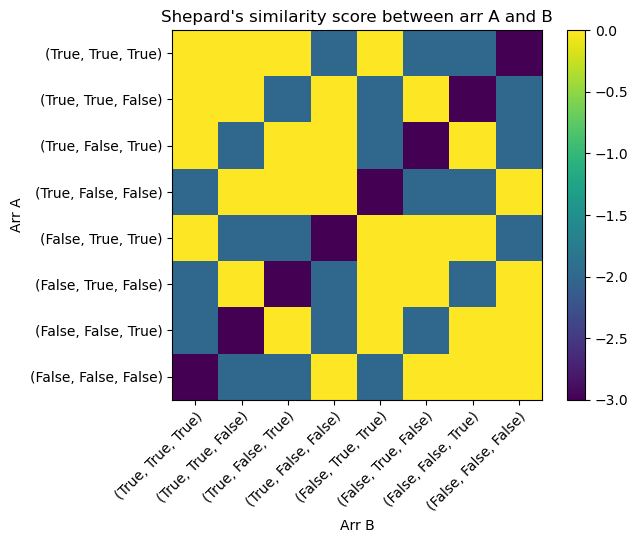

In [42]:
# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE

figure, axis = plt.subplots()

# Plot the array as a colormap
plt.imshow(shared_features, cmap='viridis')  # 'viridis' is just an example colormap; you can choose any other colormap

# Add a colorbar for reference
plt.colorbar()

axis.set_ylabel('Arr A')
axis.set_xlabel('Arr B')
axis.set_xticks(np.arange(len(all_arrays)), labels=all_combinations)
axis.set_yticks(np.arange(len(all_arrays)), labels=all_combinations)
plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
axis.set_title("Shepard's similarity score between arr A and B")

plt.savefig("PS7_Q3_2.png") # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
plt.show()

----

## Q4 Applying the Prototype Model

Now that we have both a way of computing prototypes, and another way of quantifying similarity, let's revisit our animal dataset from Q2.

First, let's load our data in again.

In [43]:
data = np.load("data/50animals.npz")

# create variables out of the arrays
animal_features = data['animal_features']
feature_names = data['feature_names']
animal_names = data['animal_names']

Recall that `animal_features` is a $50\times 80$ boolean array of features:

In [44]:
print(animal_features)

[[ True  True False ... False  True False]
 [ True  True False ... False  True  True]
 [ True False  True ... False  True False]
 ...
 [ True  True False ...  True  True False]
 [ True  True False ...  True  True False]
 [ True  True False ...  True  True False]]


And that `feature_names` is a list of length $80$ of the feature names (only the first 10 are shown here, because the list is fairly long &ndash; though feel free to take a look at the whole list if you want to!):

In [45]:
print(feature_names[:10])

['active' 'agile' 'aquatic' 'arctic habitat' 'big' 'bipedal' 'black'
 'blue' 'brown' 'builds nests']


And that `animal_names` is a list of length $50$ of the animal names (only showing the first 10 here, because the list is long):

In [46]:
print(animal_names[:10])

['antelope' 'bat' 'beaver' 'blue whale' 'bobcat' 'buffalo' 'chihuahua'
 'chimpanzee' 'collie' 'cow']


In [47]:
index = np.where(feature_names == 'active')[0][0]
print(animal_features[:,0])
print(animal_features[:,np.where(feature_names == 'active')[0][0]])
np.shape(animal_features[animal_features[:,np.where(feature_names == 'active')[0][0]]])

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True]
[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True]


(45, 80)

### Q4.1 Find a feature's prototype [4pts, SOLO]

Complete the function `find_feature_prototype` to take the name of a feature and find the **prototype** of the animals that have that feature, using your function `prototype`.

In [48]:
def find_feature_prototype(name, features, feature_names):
    """
    Computes the prototype of all animals with a given feature.
    
    Hint: your solution can be done in 2 lines of code, including the
    return statement.
    
    You should be using boolean indexing in your answer &ndash; refer back to
    Problem Set 0 if you forget how to do this!
    
    Parameters
    ----------
    name : string
        the name of a feature
    features : boolean numpy array
        animals by features, with shape (n, m)
    feature_names : list of strings
        list of feature names with length m
    
    Returns
    -------
    boolean numpy array of the prototype's features, with shape (m,)
    
    """
    #YOUR CODE HERE
    filtered = features[features[:,np.where(feature_names == name)[0][0]]]
    return prototype(filtered)

Test the `find_feature_prototype` function:

In [49]:
# load the animal data
data = np.load("data/50animals.npz")
af = data['animal_features']
fn = data['feature_names']
data.close()

# check the coastal prototype
coastal_prototype = find_feature_prototype('coastal habitat', af, fn)
assert_array_equal(coastal_prototype, np.array([ True,  True,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False, False, False, False,  True, False], dtype=bool))

for i in range(20):
    # create a random feature array, with some generic feature names
    n, m = np.random.randint(10, 100, 2)
    features = np.random.randint(0, 2, (n, m)).astype(bool)
    names = np.array(["feature_{}".format(j) for j in range(m)])
    
    # check that the prototype is correct
    j = np.random.randint(0, m)
    true_proto = prototype(np.array([f for f in features if f[j]]))
    proto = find_feature_prototype('feature_{}'.format(j), features, names)
    assert_array_equal(proto, true_proto)

# check that the function uses prototype
old_prototype = prototype
del prototype
try:
    find_feature_prototype('tusks', af, fn)
except NameError:
    pass
else:
    raise AssertionError("find_feature_prototype does not call the prototype function")
finally:
    prototype = old_prototype
    del old_prototype

print("Success!")

Success!


Try running your function on a few different features, and see what the features are for the prototype. Copy and paste the outputs of the two cells below in Gradescope.

A) "claws" prototype:

In [50]:
claws = find_feature_prototype('claws', animal_features, feature_names)
print("The 'claws' prototype has the following features:")
print(np.array(feature_names) [claws])

The 'claws' prototype has the following features:
['active' 'agile' 'black' 'brown' 'claws' 'eats red meat'
 'eats vegetation' 'fast' 'flightless' 'forager' 'forest dweller' 'furry'
 'gray' 'has paws' 'has tail' 'hunter' 'intelligent' 'lean' 'nocturnal'
 'quadrapedal' 'scavenger' 'small' 'solitary' 'timid' 'white' 'wild']


B) "domesticated" prototype:

In [51]:
domesticated_prototype = find_feature_prototype('domesticated', animal_features, feature_names)
print("The 'domesticated' prototype has the following features:")
print(np.array(feature_names)[domesticated_prototype])

The 'domesticated' prototype has the following features:
['active' 'agile' 'black' 'brown' 'claws' 'domesticated' 'eats red meat'
 'eats vegetation' 'fast' 'field dweller' 'flightless' 'furry' 'gray'
 'grazer' 'has long legs' 'has paws' 'has tail' 'intelligent' 'lean'
 'patches' 'quadrapedal' 'small' 'social' 'spots' 'swims' 'timid' 'white']


----
### Q4.2 Find animals similar to a prototype [4pts, SOLO]

Now, using both your `find_feature_prototype` function and your `shepard_sim` function, implement the function `find_similar_animals_prototype` to find the **five most similar animals** to the prototype.

Note: just like in Q2 the `np.argsort()` function might come in handy here (take a look at Problem Set 0 if you forgot how it's used). To keep ties in the original order, make sure to use `mergesort` argument (which is [stable](http://programmers.stackexchange.com/a/247441)) like so:

```
indices = np.argsort(array, kind='mergesort')
```

Submit your code for `find_similar_animals_prototype` in Gradescope (**2 points**). 

In [52]:
def find_similar_animals_prototype(name, features, feature_names, animal_names):
    """
    Finds the five most similar animals to the prototype for the given feature.
    You should return the animals in order from most similar to least similar
    to the prototype. 
    
    If two animals have the same similarity score, find_similar_animals 
    should break ties in the REVERSE of the order they appear in animal_names 
    (e.g., if the first two entries in animal_names are A and B, and both animals 
    A and B have the same similarity to target animal C, find_similar_animals should 
    place B BEFORE A when ranking them in terms of their similarity to C.)
    
    Hint: your solution can be done in 4 lines of code, including the return
    statement.
    
    Parameters
    ----------
    feature : string
        the name of a feature
    features : boolean numpy array
        animals by features, with shape (n, m)
    feature_names : list of strings
        list of feature names with length m
    animal_names : list of strings
        list of animal names with length n
    
    Returns
    -------
    a list of five animal names
    
    """
    #YOUR CODE HERE
    prototype = find_feature_prototype(name, features, feature_names)
    indices = np.argsort([shepard_sim(prototype, f) for f in features], kind='mergesort')
    return [animal_names[i] for i in np.flip(indices)[0:5]]

Test the `find_similar_animals` function:

In [53]:
# load the animal data
data = np.load("data/50animals.npz")
af = data['animal_features']
fn = data['feature_names']
an = data['animal_names']
data.close()

# check the coastal animals
assert_array_equal(
    find_similar_animals_prototype('coastal habitat', af, fn, an), 
    ['dolphin', 'beaver', 'seal', 'otter', 'killer whale'])

# check the tunnels animals
assert_array_equal(
    find_similar_animals_prototype('digs tunnels', af, fn, an),
    ['weasel', 'mouse', 'rat', 'rabbit', 'fox'])

# check the tusks animals 
assert_array_equal(
    find_similar_animals_prototype('tusks', af, fn, an),
    ['elephant', 'walrus', 'hippopotamus', 'ox', 'rhinoceros'])

# check the aquatic animals with a different feature array
assert_array_equal(
    find_similar_animals_prototype('aquatic', af[:25, :40], fn[:40], an[:25]),
    ['humpback whale', 'dolphin', 'killer whale', 'blue whale', 'elephant'])

# check that the function uses find_feature_prototype
old_find_feature_prototype = find_feature_prototype
del find_feature_prototype
try:
    find_similar_animals_prototype('coastal habitat', af, fn, an)
except NameError:
    pass
else:
    raise AssertionError("find_similar_animals does not call the prototype function")
finally:
    find_feature_prototype = old_find_feature_prototype
    del old_find_feature_prototype

# check that the function uses shepard_sim
old_shepard_sim = shepard_sim
del shepard_sim
try:
    find_similar_animals_prototype('coastal habitat', af, fn, an)
except NameError:
    pass
else:
    raise AssertionError("find_similar_animals does not call the shepard_sim function")
finally:
    shepard_sim = old_shepard_sim
    del old_shepard_sim

print("Success!")

Success!


In [54]:
# Optional: add your own test cases here

Run the cells below and see what the five most similar animals are for the "claws" and "domesticated" prototypes you calculated above. Copy and paste the output of the two cells below into Gradescope (**1 point each**).

In [55]:
print("The most similar animals to the claws prototype are:")
print(find_similar_animals_prototype('claws', animal_features, feature_names, animal_names))

The most similar animals to the claws prototype are:
['siamese cat', 'weasel', 'persian cat', 'wolf', 'raccoon']


In [56]:
print("The most similar animals to the domesticated prototype are:")
print(find_similar_animals_prototype('domesticated', animal_features, feature_names, animal_names))

The most similar animals to the domesticated prototype are:
['chihuahua', 'dalmatian', 'collie', 'persian cat', 'horse']


----
## Q5 Evaluating the Prototype Model [5pts, SOLO]

Run your `find_feature_prototype` function and see what features the 'carnivore' prototype has:

In [57]:
carnivore_prototype = find_feature_prototype('carnivore', animal_features, feature_names)
print("The 'carnivore' prototype has features:")
print(np.array(feature_names)[carnivore_prototype])


The 'carnivore' prototype has features:
['active' 'agile' 'big' 'black' 'brown' 'carnivore' 'claws'
 'eats red meat' 'fast' 'fierce' 'flightless' 'furry' 'has paws'
 'has tail' 'hunter' 'intelligent' 'lean' 'quadrapedal' 'social' 'stalker'
 'strong' 'swims' 'white' 'wild']


In [58]:
animal_names

array(['antelope', 'bat', 'beaver', 'blue whale', 'bobcat', 'buffalo',
       'chihuahua', 'chimpanzee', 'collie', 'cow', 'dalmatian', 'deer',
       'dolphin', 'elephant', 'fox', 'german shepherd', 'giant panda',
       'giraffe', 'gorilla', 'grizzly bear', 'hamster', 'hippopotamus',
       'horse', 'humpback whale', 'killer whale', 'leopard', 'lion',
       'mole', 'moose', 'mouse', 'otter', 'ox', 'persian cat', 'pig',
       'polar bear', 'rabbit', 'raccoon', 'rat', 'rhinoceros', 'seal',
       'sheep', 'siamese cat', 'skunk', 'spider monkey', 'squirrel',
       'tiger', 'walrus', 'weasel', 'wolf', 'zebra'], dtype='<U15')

Now run your function `find_similar_animals` for the input 'carnivore':

In [59]:
print("The five most similar animals to the 'carnivore' prototype are: ", find_similar_animals_prototype('carnivore', animal_features, feature_names, animal_names))

The five most similar animals to the 'carnivore' prototype are:  ['german shepherd', 'tiger', 'wolf', 'lion', 'dalmatian']


Answer the following questions in Gradescope:

A) What are the five most similar animals it returns to prototype of the 'carnivore' animals? (**1 point**)

The five most similar animals to the 'carnivore' prototype are:  ['german shepherd', 'tiger', 'wolf', 'lion', 'dalmatian']

B) Do you agree that these animals are are similar to the prototype? Do they match your intuitions for the *most* similar animals to the prototype (that is, if you were to intuitively pick out the five animals most similar to the 'carnivore' prototype, would you pick those five in that order)? (**2 points**)

I do agree that all 5 of these animals are similar to the carnivore prototype, as they are all strictly carnivores. However, it does not exactly match my intuitions for the most similar animals to the carnivore prototype. If I were to intuitively pick 5 animals myself, I would've picked some ordering of the lion, tiger, killer whale, wolf, or leopard as the most similar animals to the carnivore prototype, which edges out the selections of german shepard and dalmatian.

C) If you answered "yes" above, explain what about either Shepard's law or prototypes makes this a good similarity metric. If "no", what about Shepard's law or prototypes causes your intuition to be challenged? (**2 points**)

My answer was no; the application of Shepard's law and prototypes applies too much generalization of features and doesn't capture how certain features can actually contradict how we interpret psychological similarity and distance via asymmetrical similarity.

<div style="background-color: #c1f2a5">
    
# Part 2
# Simple neural networks: Hebbian learning

In this part, we will explore some of the simplest forms of learning in neural networks: Hebbian learning.    

## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.
    
Reminder - all questions are solo questions for this problem set.

Unless we specify otherwise, make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
**Test cases are here to help you debug your code, but passing them successfully is not a guarantee that your code is correct.**
    
</div>

In [60]:
import numpy as np

## Q6 Hebbian network weights

One of the simplest neural network learning algorithms is Hebbian
learning, in which the weight between two nodes is increased when
those nodes take on the same value, and decreased when they take on
different values. If ${\bf x} = (x_1, \ldots x_n)^T$ and
${\bf y} = (y_1, \ldots, y_m)^T$ are $n \times 1$ and $m \times 1$
vectors representing the inputs and outputs to a neural network
respectively, the weights of the neural network can be expressed in a
$m \times n$ matrix ${\bf W}$. The networks predicted output
$\mathbf{\hat{y}}$ is then:

\begin{equation}      
\mathbf{\hat{y}}  = \mathbf{Wx}
\end{equation}

We train the neural network by providing it with a set of input-output
pairs, $({\bf x},{\bf y})$. Hebbian learning adjusts the weights using
the following equation for each input-output pair:

\begin{equation}         
\Delta\mathbf{W} = \eta \mathbf{y}\mathbf{x}^{T}
\end{equation} 
        
In other words, the change in the weight matrix $\mathbf{W}$ is determined by
the outer product of the output and input vectors, multiplied by the
learning rate $\eta$. Then, the updated weight matrix equals the old
weight matrix plus $\Delta\mathbf{W}$.

\begin{equation}         
\mathbf{\hat{W}} = \mathbf{W} + \Delta \mathbf{W}
\end{equation} 

Another way to think about this is that each weight $w_{ij}$, which connects input neuron $j$ to output neuron $i$, is updated based on the correlation between their values:

\begin{equation}
\Delta{w_{ij}} = w_{ij} + \eta y_i x_j
\end{equation}

The Hebb rule was inspired by people thinking about how neuronal interactions may enable learning, and was confirmed by experiments many years later. It is, therefore, a good example of how considering a problem at the algorithmic level can guide the investigation of the implementational, and, vice versa, how discoveries at the implementational level can confirm thoughts about the suitability of algorithmic descriptions of processes.

Read more about the motivation and formulation behind the Hebb rule here: https://en.wikipedia.org/wiki/Hebbian_theory

Independent of its neuronal interpretations and basis, the Hebb rule forms the basis of many systems for *unsupervised* learning, as it organizes networks based solely on the statistics of the input, rather than any teaching signal.


### Q6.1 Implementing the Hebbian learning rule [4pts, HELP]

Assume we want to learn what noises animals make based on their
traits. We might list four input features:

1. chasing sticks
2. liking water 
3. having whiskers
4. being furry

Each of the features can take on one of the two different logical values: 1 (<code>TRUE</code>) and -1 (<code>FALSE</code>). 

Therefore, we would then represent dogs with ${\bf x}_{\rm dog} = ( 1, 1, 1, 1)^T$ and cats with ${\bf x}_{\rm cat} = (-1,-1,1,1)^T$. 

Likewise, we could have four output features (noise types):

1. hissing
2. barking
3. neighing
4. growling

with ${\bf y}_{\rm dog} = (-1,1,-1,1)^T$ and ${\bf y}_{\rm cat} = (1, -1 -1, 1)^T$. Then, $(\mathbf{x}_{\rm dog},\mathbf{y}_{\rm dog})$ would be the input-output pair for dogs, and $(\mathbf{x}_{\rm cat},\mathbf{y}_{\rm cat})$ would be the input-output pair for cats. 





In [61]:
inputFeatures = ['chases sticks', 'likes water','whiskers','furry']
outputFeatures = ['hisses','barks','neighs','growls']

xDog = np.array([ 1., 1., 1., 1. ])
xCat = np.array([ -1., -1., 1., 1. ])

yDog =  np.array([ -1., 1., -1., 1. ])
yCat = np.array([ 1., -1., -1., 1. ])

trainingInputs = np.column_stack((xDog, xCat))
trainingOutputs = np.column_stack((yDog, yCat))

W = np.zeros((len(xDog),len(xDog)))

Complete the function `updateWeights` so that it takes in the following parameters:

1. the current weight matrix $\mathbf{W}$
2. a matrix of training data inputs
3. a matrix of training data outputs 

and returns a matrix containing weights updated using Hebbian learning on the given training data.

The matrix of training data inputs should have training instances as
its columns. For example, if there were two training instances,
$\mathbf{x}_{\rm dog}$ and $\mathbf{x}_{\rm cat}$, the matrix would
have two columns:
$\left[\mathbf{x}_{\rm dog},\mathbf{x}_{\rm cat}\right]$. The matrix
of training data outputs should have two columns corresponding to
output instances:
$\left[\mathbf{y}_{\rm dog},\mathbf{y}_{\rm cat}\right]$. The learning rate $\eta$ is set at $.25$ inside <code>updateWeights</code> as a default.

Copy your function into gradescope.

In [62]:
def updateWeights(W, trainingInputs, trainingOutputs, eta = 0.25):
    """
    Updates the current weight matrix W using Hebbian learning.
    
    Hint: your solution can be done in a single line of code, 
    including the return statement.
    
    Parameters
    ----------
    W: the trained weight matrix
    trainingInputs:  a matrix where each column represents a set of 
        input features
    trainingOutputs: a matrix where each column represents a set of 
        output features
    eta: the learning rate, set at 0.25 by default    

    Returns
    -------
    a matrix with the updated weight matrix after the network has seen 
        the given training data.

    """
    #YOUR CODE HERE
    return W + eta * np.matmul(trainingOutputs, np.transpose(trainingInputs))

In [63]:
updatedW = updateWeights(W,trainingInputs,trainingOutputs)
print(W)
print(updatedW)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[-0.5 -0.5  0.   0. ]
 [ 0.5  0.5  0.   0. ]
 [ 0.   0.  -0.5 -0.5]
 [ 0.   0.   0.5  0.5]]


In [64]:
# add your own test cases here!

In [65]:
"""Check that `updateWeights` produces expected output."""
from nose.tools import assert_equal
from numpy.testing import assert_allclose

testW0 = np.zeros((4,4))
testInputs1 = np.array([[1, -1, 1],[1, -1, 1],[1, 1, 1],[1, 1, 1]])
testOutputs1 = np.array([[-1, 1, 1],[1, -1, 1],[-1, -1, 1],[1, 1, 1]])

testW1 = updateWeights(testW0, testInputs1[:,[0,1]],testOutputs1[:,[0,1]])

"""Confirm that the output is an array""" 
assert(isinstance(testW1, np.ndarray))

"""Check if dimensions are the same as the original weights""" 
assert_equal(testW1.shape, (4, 4))

"""Check if weight matrix sums to 0, if trained on first two examples""" 
assert_equal(testW1.sum(),0)

testW2 = updateWeights(testW0, testInputs1, testOutputs1)

"""Check if weight matrix sums to 4, if trained on all three examples""" 
assert_equal(testW2.sum(),4)

testW3 = updateWeights(np.zeros((3,3)), testInputs1[0:3,], testOutputs1[0:3,])

"""Check if dimensions are the same as the original weights""" 
assert_equal(testW3.shape, (3, 3))

"""Check if the weight matrix is correct: Input 1""" 
testW4 = updateWeights(testW0, testInputs1,testOutputs1)
assert_allclose(testW4,np.array(
       [[-0.25, -0.25,  0.25,  0.25],
       [ 0.75,  0.75,  0.25,  0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [ 0.25,  0.25,  0.75,  0.75]]))

"""Check if the weight matrix is correct: Input 2""" 
test_xDog = np.array([ 1., 1., 1., 1. ])
test_xCat = np.array([ -1., -1., 1., 1. ])
test_yDog =  np.array([ -1., 1., -1., 1. ])
test_yCat = np.array([ 1., -1., -1., 1. ])

testInputs2 = np.column_stack((test_xDog, test_xCat))
testOutputs2 = np.column_stack((test_yDog, test_yCat))

testW5 = updateWeights(testW0, testInputs2,testOutputs2)
assert_allclose(testW5,np.array(
       [[-0.5, -0.5,  0. ,  0. ],
       [ 0.5,  0.5,  0. ,  0. ],
       [ 0. ,  0. , -0.5, -0.5],
       [ 0. ,  0. ,  0.5,  0.5]]))

print("Success!")

Success!


### Q6.2 Visualizing the Hebbian network's weights [4pts, SOLO]

Let's visualize different weights obtained from the `updateWeights` function.  Note that the skeleton code is provided to you in the next cell; however, the figure is missing some important components. 

Add 1) x-axis label, 2) y-axis label, 3) subplot titles, and 4) overall figure title. 

Upload your figure to gradescope as PS7_Q6_2.png.

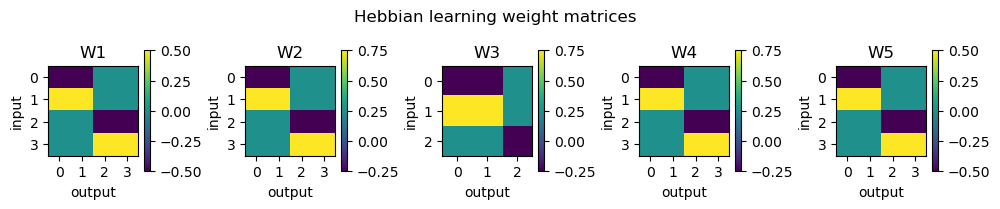

In [66]:
# Create subplots with a 1x2 grid
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(10, 2))
    
im1 = axs[0].imshow(testW1, cmap='viridis')
fig.colorbar(im1, ax=axs[0])
im2 = axs[1].imshow(testW2, cmap='viridis')
fig.colorbar(im2, ax=axs[1])
im3 = axs[2].imshow(testW3, cmap='viridis')
fig.colorbar(im3, ax=axs[2])
im4 = axs[3].imshow(testW4, cmap='viridis')
fig.colorbar(im4, ax=axs[3])
im5 = axs[4].imshow(testW5, cmap='viridis')
fig.colorbar(im5, ax=axs[4])

# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE

for i in np.arange(5):
    axs[i].set_ylabel('input')
    axs[i].set_xlabel('output')
    if i == 2: continue
    axs[i].set_xticks(np.arange(4), labels=np.arange(4))
    axs[i].set_yticks(np.arange(4), labels=np.arange(4))

axs[2].set_xticks(np.arange(3), labels=np.arange(3))
axs[2].set_yticks(np.arange(3), labels=np.arange(3))
    
axs[0].set_title("W1")
axs[1].set_title("W2")
axs[2].set_title("W3")
axs[3].set_title("W4")
axs[4].set_title("W5")

plt.suptitle("Hebbian learning weight matrices")

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig('PS7_Q6_2.png') # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
plt.show()

In [67]:
# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE

# Adjust layout to prevent clipping of titles
# plt.tight_layout()

# plt.savefig('PS7_Q6_2.png') # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
# plt.show()

## Q7 Making predictions [4pts, SOLO]

Calculate the network's predicted output
($\mathbf{\hat{y}}$) for inputs ${\bf x}_{\rm dog}$ and
${\bf x}_{\rm cat}$.

Complete the function <code>getPredictions</code>, which takes ${\bf x}_{\rm dog}$, ${\bf x}_{\rm cat}$, and <code>updatedW</code> as parameters and returns a **dictionary** with the keys <code>yhatCat</code> and <code>yhatDog</code>, each with respective predicted binary feature arrays for cat and dog as values.

If you need a refresher on dictionaries check out this link: https://docs.python.org/3/tutorial/datastructures.html#dictionaries

Copy your function into gradescope.

**Hint:** To double-check that your code is functioning correctly,
these predicted outputs should be equal to their respective training
data outputs because the training data vectors are orthogonal.


In [68]:
def getPredictions(xDog, xCat, updatedW):   
    """
    Gets predicted binary feature vectors for cats and dogs
    
    Hint: your solution can be done in one or two lines of code, 
    including the return statement. 
    
    Parameters
    ----------
    xDog: the feature vector representing the input features for dog
    xCat: the feature vector representing the input features for cat
    updatedW: the weight matrix after training
 
    Returns
    -------
    a dictionary with two key-value pairs
        'yhatCat' ; the predicted binary features for cat 
        'yhatDog' ; the predicted binary features for dog 

    """    
    #YOUR CODE HERE
    return {'yhatCat': np.matmul(updatedW,xCat), 'yhatDog': np.matmul(updatedW,xDog)}

In [69]:
predictions = getPredictions(xDog, xCat, updatedW)
print(predictions)

{'yhatCat': array([ 1., -1., -1.,  1.]), 'yhatDog': array([-1.,  1., -1.,  1.])}


In [70]:
# add your own test cases here!

In [71]:
"""Confirm that the output is an array""" 
testPredictions = getPredictions(test_xDog, test_xCat, testW5)
assert_equal(type(testPredictions), dict)

"""Check if the keys are defined""" 
assert_equal('yhatCat' in testPredictions and 'yhatDog' \
    in testPredictions, True)

"""Check that the vectors are binary, with 1 and -1"""
assert(testPredictions['yhatCat'].prod() == 1 or  \
       testPredictions['yhatCat'].prod() == -1)
assert(testPredictions['yhatDog'].prod() == 1 or \
       testPredictions['yhatDog'].prod() == -1)

"""Check that the vectors are of the right length"""
assert_equal(len(testPredictions['yhatCat']), 4)
assert_equal(len(testPredictions['yhatDog']), 4)

"""Check that the predicted output is the same as the true output"""
assert(all(testPredictions['yhatCat'] == test_yCat))
assert(all(testPredictions['yhatDog'] == test_yDog))


"""Check that the predicted output for arbitrary input"""
testInput1 = np.array([-1, -1, -1, -1])
testInput2 = np.array([1, 1, -1, -1])
testPredictions2 = getPredictions(testInput1, testInput2, updatedW)
assert_allclose(testPredictions2['yhatCat'], \
                np.array([-1.,  1.,  1., -1.]))
assert_allclose(testPredictions2['yhatDog'], \
                np.array([ 1., -1.,  1., -1.]))

print("Success!")

Success!


## Q8 Incorporating uncertainty [4pts, SOLO]

Now, imagine you saw an animal that was definitely furry and had
whiskers, but you weren't sure about whether it liked water or chased
sticks.

We could represent the features of this animal as the (convex) combination:

\begin{equation}
{\bf x}_{\rm unknown} = \alpha {\bf x}_{\rm dog} + (1-\alpha) {\bf x}_{\rm cat}
\end{equation}

for some value of $\alpha$ between $0$ and $1$. In other words, because we aren't certain of certain features in the ${\bf x}_{\rm unknown}$ vector, we can use various values of $\alpha$ to quantify our uncertainty.

Copy your function into gradescope.

In [72]:
def getWeightedPredictions(xDog, xCat, updatedW):   
    """
    Get predicted binary feature vectors given a series of part-cat, 
    part-dog inputs, corresponding to alpha values of .2, .5 and .8 
    
    Hint: your solution can be done in about three lines of code, 
    not including the return statement. 
    
    Parameters
    ----------
    
    xDog: the feature vector representing the input features for dog
    xCat: the feature vector representing the input features for cat
    updatedW: the weight matrix after training
 
    Returns
    -------
    a dictionary with three key-value pairs
        'yhatAnimalX2' ; the predicted binary features when alpha = .2 
        'yhatAnimalX5' ; the predicted binary features when alpha = .5 
        'yhatAnimalX8' ; the predicted binary features when alpha = .8 

    """    
    #YOUR CODE HERE
    alpha = [0.2,0.5,0.8]
    x = []
    for a in alpha: x.append(a * xDog + (1-a) * xCat)
    return {'yhatAnimalX2': np.matmul(updatedW,x[0]), 'yhatAnimalX5': np.matmul(updatedW,x[1]), 'yhatAnimalX8': np.matmul(updatedW,x[2])}

In [73]:
weightedPredictions = getWeightedPredictions(xDog, xCat, updatedW)
print(weightedPredictions)

{'yhatAnimalX2': array([ 0.6, -0.6, -1. ,  1. ]), 'yhatAnimalX5': array([ 0.,  0., -1.,  1.]), 'yhatAnimalX8': array([-0.6,  0.6, -1. ,  1. ])}


## Q9 Discussion

### Q9.1 Interpreting weighted predictions [6pts, SOLO]

Answer the following question in Gradescope:

Interpret these predictions in terms of the noises the animal might
make. This subquestion is worth **6 points**, so give a detailed answer, stating the predictions generated and your interpretation of each (3-6 sentences).


For the animal associated with alpha=.2, the network predicts [0.6, -0.6, -1, 1] for the output features of noise types. We can interpret this result as the animal being more likely to hiss, unlikely to bark, will definitively not neigh, and will definitively growl.

For the animal associated with alpha=.5, the network predicts [0, 0, -1, 1] for the output features of noise types. We can interpret this result as the animal being definitive to growl and to not neigh.

For the animal associated with alpha=.8, the network predicts [-0.6, 0.6, -1, 1] for the output features of noise types. We can interpret this result as the animal being unlikely to hiss, more likely to bark, will definitively not neigh, and will definitively growl.

### Q9.2 Hebbian learning vs. rules and symbols [4pts, SOLO]


Answer the following question in Gradescope:

How does the kind of solution the neural network produces differ
from the kind of thing we might expect from an account based on rules
and symbols (2-4 sentences)? (**4 points**)


An account based on rules and symbols will give a binary solution for each of the output features, based on whether it meets the criteria of the rules and symbols approach or not. This differs from the neural network, as it produces a probabilistic solution of whether an output feature is observed.

<div style="background-color: #c1f2a5">
    
# Part 3
# Bayesian inference: The coin of infinite hypotheses


## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.
    
Reminder - all questions are solo questions for this problem set.

Unless we specify otherwise, make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
**Test cases are here to help you debug your code, but passing them successfully is not a guarantee that your code is correct.**
    
</div>

One day, you find yourself standing in a musty room in the back of an old magic shop. Heavy velvet curtains cover the dirty windows, reluctantly letting in a few narrow beams of light, which succeed only in illuminating layers of dust suspended in the stale air. You glance around cautiously, trying not to invite scrutiny from the watchful shopkeep. Your eyes dance over row upon row of leather-bound books, resting on the rich mahogany shelves lining each wall. Who knows how long they've been here, or what ancient secrets they conceal. They almost call out to you to be opened, to divulge their long-forgotten knowledge. But no... you've come here for another reason.

 Before you can even turn around, the shopkeep anticipates your question. "You've come for a coin, haven't you?" His voice sounds strangely distant, and reminds you of some kind of large, creepy bird or something. You nod, swallowing. He totters past you, one of his legs struggling to keep up with the other. Reaching a black armoire in the corner of the room — how did you not notice it before? — he stops. The shopkeep slowly opens one of the drawers, revealing a beautiful, glimmering coin. It looks perfectly untarnished, yet, somehow, emanates the energy of centuries past. 

 Your father's deep, soulful voice echoes in your head. "Fetch me a coin of Azeroth, child, but only if its probability of landing heads is between 0.55 and 0.75."
 
 **To summarize:** a shopkeeper gets a coin out of an armoire in his magic shop, and shows it to you. You must determine if it meets your father's criteria: a probability of landing heads between 0.55 and 0.75.
  
  <hr/>
  
  Is the coin in the armoire such a coin? How can we determine if this coin matches father's request?

  We can formalize your predicament by letting the variable $\theta$ denote a coin of Azeroth's probability of landing heads on each toss, which is what you need to infer. We assume that each toss is independent of the others. In this learning problem, your hypothesis space is the set of all possible values of $\theta$, which is all the real numbers from 0 to 1. We need to compare an infinite number of hypotheses! How can we do this?

In the remaining part of the problem set, you will write functions that estimate the weight of the coin. Each function takes a single argument, a sequence of tosses, a $1 \times n$ binary row vector representing an observed sequence of coin tosses where `1`'s represent heads and `0`'s represent tails.

## Q10 Maximum Likelihood Estimation [4pts, SOLO]

Using the standard frequentist method of *maximum likelihood estimation*, define a function <code>mle_azeroth</code> that, given a sequence of tosses, returns an estimate for the value of $\theta$ - the probability that the coin lands heads up. Remember that *MLE* relies only on data that we've actually observed, so the prior should **NOT** factor into your answer. The equation for MLE can be found in the lecture notes.

In [74]:
def mle_azeroth(sequence):
    """Uses MLE to estimate the value of theta.
    
    Hint: Your solution can be done in 1 line of code.
    
    Parameters
    ----------
    sequence : an (m,) Numpy array of 1s and 0s.
        The observed sequence of coin flips.
        
    Returns
    -------
    The value of theta, a float.
    
    """
    #YOUR CODE HERE
    return np.mean(sequence)

In [75]:
"""Check that the function is correct."""
assert(mle_azeroth)

sequence = np.array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1])
assert(mle_azeroth(sequence) == 0.8)

sequence = np.array([1, 1, 1, 1, 1])
assert(mle_azeroth(sequence) == 1.0)

sequence = np.array([0, 0, 0, 0, 0])
assert(mle_azeroth(sequence) == 0.0)

sequence = np.array([1, 0])
assert(mle_azeroth(sequence) == 0.5)

sequence = np.array([1, 0, 1, 0])
assert(mle_azeroth(sequence) == 0.5)

sequence = np.array([1, 0, 1, 0, 1, 0])
assert(mle_azeroth(sequence) == 0.5)

print("Success!")

Success!


The following cell uses the <code>mle_azeroth</code> function to compute MLE for multiple coin toss sequences, and plots the obtained MLE values.

The generated figure is missing important components - add all labels, including a legend, that are needed to make it clear what the figure is showing. 

Upload your figure to gradescope as PS7_Q10.png.

In [76]:
# Generate example data
x = np.linspace(0, 1, 11)
y= np.zeros(11)
z = np.ones(11)
sequence = np.zeros(10)

for i in range(10):
    sequence[i] = 1
    y[i+1] = mle_azeroth(sequence)
    z[i+1] = mle_azeroth(1-sequence)

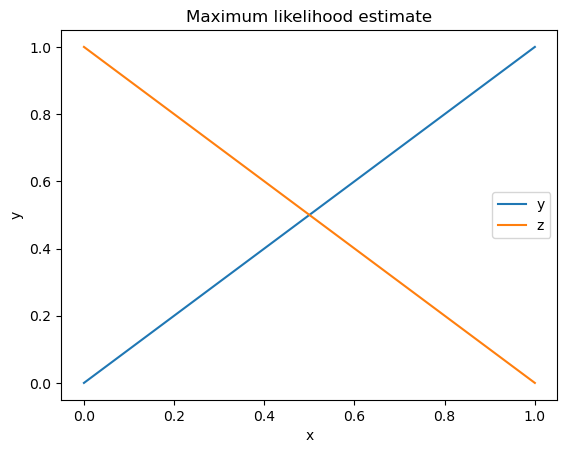

In [77]:
# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE
    
# Plot the three variables on the same graph
plt.plot(x,y,label='y')
plt.plot(x,z,label='z')

plt.legend()
plt.title('Maximum likelihood estimate')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('PS7_Q10.png') # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
plt.show()

## Q11 Maximum A Posteriori estimation [4pts, SOLO]

Assuming a **Bernoulli likelihood** and a **Beta prior**, define a function <code>map_azeroth</code> that computes the *maximum a posteriori* (MAP) estimate for $\theta$. Your prior should be defined by two variables, `prior_heads` and `prior_tails`, which act as pseudocounts of the number of previously seen heads and tails.) The equation for computing the MAP estimate can be found in the lecture notes.

In [78]:
def map_azeroth(sequence, prior_heads=0, prior_tails=0):
    """Computes the MAP estimate of theta.
    
    Hint: Your solution can be done in a line or two of code.
    
    Parameters
    ----------
    sequence : an (m,) Numpy array of 1s and 0s.
        The observed sequence of coin flips.
    prior_heads : an integer psedocount representing the
        prior beliefs that the coin is biased towards heads.
    prior_tails : an integer psedocount representing the
        prior beliefs that the coin is biased towards tails.
        
    Returns
    -------
    The value of theta, a float.
    
    """
    #YOUR CODE HERE
    return (np.sum(sequence) + prior_heads) / (len(sequence) + prior_heads + prior_tails)

In [79]:
"""Check that the function exists."""
assert(map_azeroth)

"""Check that, with no prior specified, the MAP and MLE estimates are the same."""
for i in range(10):
    sequence = np.random.randint(0, 1, size=(10,))
    assert(mle_azeroth(sequence) == map_azeroth(sequence))

"""Check that changing the prior changes the estimate."""
sequence = np.array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1])
assert(map_azeroth(sequence) == 0.8)
assert(map_azeroth(sequence, 1, 1) == 0.75)
assert(map_azeroth(sequence, 5, 5) == 0.65)
assert(map_azeroth(sequence, 1, 9) == 0.45)
assert(map_azeroth(sequence, 15, 205) == 0.1)
assert(map_azeroth(np.array([]), 1, 1) == 0.5)
assert(map_azeroth(np.array([1, 0]), 1, 1) == 0.5)
assert(map_azeroth(np.array([1, 1, 1, 1, 1, 0]), 1, 1) == 0.75)
assert(map_azeroth(np.array([0, 0, 0, 0, 0, 1]), 1, 1) == 0.25)

print("Success!")

Success!


The following cell uses the <code>map_azeroth</code> function to compute MAP for multiple coin toss sequences, and plots the obtained MAP values.

The generated figure is missing important components - add all labels, including a legend, that are needed to make it clear what the figure is showing. 

Upload your figure to gradescope as PS7_Q11.png.

In [80]:
# Generate example data
x = np.linspace(0, 1, 11)
y1= np.zeros(11)
y2 = np.ones(11)
y3 = np.ones(11)
sequence = np.zeros(10)

y1[0] = map_azeroth(sequence, prior_heads=5, prior_tails=10)
y2[0] = map_azeroth(sequence, prior_heads=3, prior_tails=3)
y3[0] = map_azeroth(sequence, prior_heads=10, prior_tails=5)
for i in range(10):
    sequence[i] = 1
    y1[i+1] = map_azeroth(sequence, prior_heads=5, prior_tails=10)
    y2[i+1] = map_azeroth(sequence, prior_heads=3, prior_tails=3)
    y3[i+1] = map_azeroth(sequence, prior_heads=10, prior_tails=5)

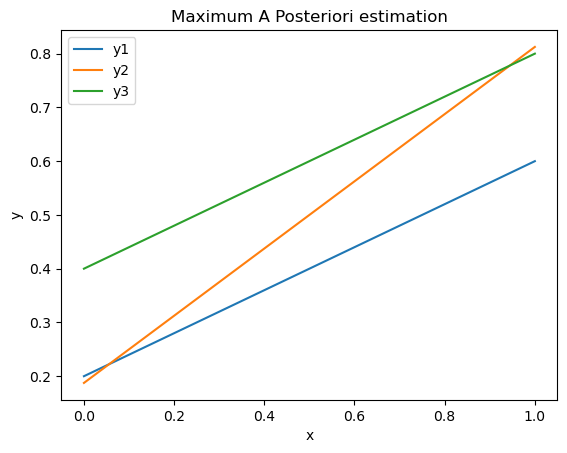

In [81]:
# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE
    
# Plot the three variables on the same graph
plt.plot(x,y1,label='y1')
plt.plot(x,y2,label='y2')
plt.plot(x,y3,label='y3')

plt.legend()
plt.title('Maximum A Posteriori estimation')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('PS7_Q11.png') # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
plt.show()

## Q12 Posterior mean estimate [4pts, SOLO]

Assuming a **Bernoulli likelihood** and a **Beta prior**, define a function <code>pm_azeroth</code> that computes the *posterior mean* estimate for $\theta$. Your prior should be defined by two variables, `prior_heads` and `prior_tails`, which act as pseudo-counts of the number of previously seen heads and tails.)

In [82]:
def pm_azeroth(sequence, prior_heads=0, prior_tails=0):
    """Computes the posterior mean estimate of theta.
    
    Hint: Your solution can be done in a line or two of code.
    
    Parameters
    ----------
    sequence : an (m,) Numpy array of 1s and 0s.
        The observed sequence of coin flips.
    prior_heads : an integer psedocount representing the
        prior beliefs that the coin is biased towards heads.
    prior_tails : an integer psedocount representing the
        prior beliefs that the coin is biased towards tails.
        
    Returns
    -------
    The value of theta, a float.
    
    """
    #YOUR CODE HERE
    return (np.sum(sequence) + prior_heads + 1) / (len(sequence) + prior_heads + prior_tails + 2)

In [83]:
"""Check that the function exists."""
assert(pm_azeroth)


"""Check that changing the prior changes the estimate."""
sequence = np.array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1])
assert(pm_azeroth(sequence) == 0.75)
assert(pm_azeroth(sequence, 1, 7) == 0.5)
assert(pm_azeroth(sequence, 7, 1) == 0.8)
assert(pm_azeroth(sequence, 27, 1) == 0.9)
assert(pm_azeroth(sequence, 124, 130) == 0.5)
assert(pm_azeroth(np.array([]), 1, 1) == 0.5)
assert(pm_azeroth(np.array([1, 0]), 1, 1) == 0.5)
assert(pm_azeroth(np.array([1, 1, 1, 1, 1, 0]), 1, 1) == 0.70)
assert(pm_azeroth(np.array([0, 0, 0, 0, 0, 1]), 1, 1) == 0.30)

print("Success!")

Success!


The following cell uses the <code>pm_azeroth</code> function to compute posterior means for multiple coin toss sequences and priors, and plots the obtained posterior means values.

The generated figure is missing important components - add all labels, including a legend, that are needed to make it clear what the figure is showing. 

Upload your figure to gradescope as PS7_Q12.png.

In [84]:
# Generate example data
x = np.linspace(0, 1, 11)
y= np.zeros(11)

sequence = np.zeros(10)
y1[0] = map_azeroth(sequence, prior_heads=5, prior_tails=10)
y2[0] = map_azeroth(sequence, prior_heads=100, prior_tails=100)
y3[0] = map_azeroth(sequence, prior_heads=10, prior_tails=5)
for i in range(10):
    sequence[i] = 1
    y1[i+1] = pm_azeroth(sequence, prior_heads=5, prior_tails=10)
    y2[i+1] = pm_azeroth(sequence, prior_heads=100, prior_tails=100)
    y3[i+1] = pm_azeroth(sequence, prior_heads=10, prior_tails=5)

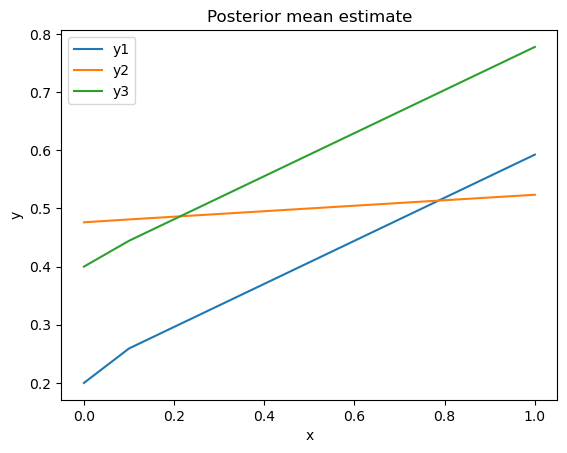

In [85]:
# TODO: EDIT THIS CELL OR ADD NEW LINES TO ADD WHAT IS MISSING FROM THIS FIGURE
   
# Plot the three variables on the same graph
plt.plot(x,y1,label='y1')
plt.plot(x,y2,label='y2')
plt.plot(x,y3,label='y3')

plt.legend()
plt.title('Posterior mean estimate')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('PS7_Q12.png') # uncomment this line when you have made your modifications and are ready to save the figure

# Show the plot
plt.show()

## Q13 Drawing conclusions

### Q13.1 MLE vs. MAP vs. posterior mean [3pts, SOLO]

Assume you tossed a coin of Azeroth 10 times and observed the specific sequence `HHTHTHHHHH`. Further assume that we've observed some fictitious trials and have a prior belief that coins of Azeroth are slightly biased towards landing heads. Thus, let $V_H$ = 55 and $V_T$ = 45, denoting that in the past we've observed the coin of Azeroth flipped 100 times and saw 55 heads and 45 tails.

Let's see the results of our estimators by running the next cell.

Copy the numbers printed out by the next cell into the appropriate fields in Gradescope. 

In [86]:
sequence = np.array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1])
print("MLE: {}".format(mle_azeroth(sequence)))
print("MAP: {}".format(map_azeroth(sequence, prior_heads=55, prior_tails=45)))
print("Posterior mean: {}".format(pm_azeroth(sequence, prior_heads=55, prior_tails=45)))

MLE: 0.8
MAP: 0.5727272727272728
Posterior mean: 0.5714285714285714


### Q13.2 Evaluating the coin's bias [4pts, SOLO]

Answer the following question in Gradescope:

Given the father's request for a coin with probability of landing heads between $0.55$ and $0.75$ - do you think you should you take this coin? Why or why not?

Given the request, I would take the coin. This is because the MAP and posterior mean is between the required coin probabilities of the request. Our prior beliefs on the coin being slightly biased towards heads and our observation of the specific sequence HHTHTHHHHH also both support the notion that this coin does land somewhere between those probabilities of landing heads.

<div style="background-color: #c1f2a5">

# Submission


Before turning this problem set in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

    
After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.
    
When you've made sure there are no issues in your code:
- Upload your answers in Gradescope's PS7.
- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
</div>


<center>    
  <img src="../img/py_exporting_instructions.png" width="500"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS6-code.
    
</div>        




</div>
